# Section 1: Dataset

Aside from being the hardest material on Earth, diamonds are also known for their rarity and value. They have been highly valued for centuries and are often associated with luxury and wealth, and I was recently curious on what goes into determining the value of a diamond. As I examine this dataset, I will also explore the market dynamics that determine diamond value. The dataset includes numerical features such as carat (weight), table (the width of the widest point at the top of the diamond), and x, y, and z (the diamond's width, length, and depth), as well as the price of each diamond.

In [244]:
import pandas as pd
df = pd.read_csv("diamonds_dataset_kaggle.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Section 2: Exploratory Data Analysis

The descriptive statistics provide a comprehensive overview of the 'diamonds' dataset, offering key insights into the distribution and average tendencies of the variables. The count, mean, and standard deviation show the size of the dataset and the variability of each attribute, ranging from carat to price. The minimum and maximum values showcase the full extent of the dataset, highlighting the diversity in values. The quartiles (25th, 50th, and 75th percentiles) provide valuable information about the spread of the data and help identify potential outliers that could be confounded by non-numerical data. For example, the median (50th percentile) serves as a measure of central tendency, indicating the middle point of the distribution. A feature way off from this value could mean that there are certain non-numerical confounders, such as cut, color, or hue, that may have impacted the data. These descriptive statistics are the foundation for understanding the dataset's characteristics.

In [245]:
descriptive_stats = df.describe()
data_shape = df.shape

print(descriptive_stats)
print("Dataset Shape:", data_shape)

              carat         depth         table         price             x  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.799444     61.753006     57.457830   3944.805440      5.734403   
std        0.475173      1.431088      2.232092   3997.938105      1.123077   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2410.000000      5.700000   
75%        1.040000     62.500000     59.000000   5351.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  50000.000000  50000.000000  
mean       5.737956      3.541056  
std        1.145579      0.707065  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


# Section 3: Exploratory Data Visualization

<Axes: xlabel='carat', ylabel='price'>

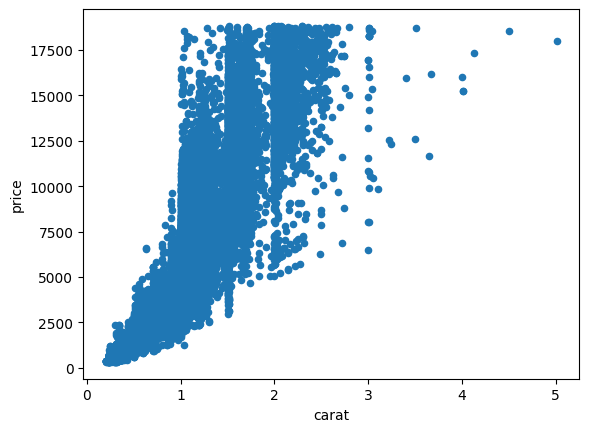

In [246]:
df.plot.scatter(x='carat',y='price')

This visualization is a scatter plot showcasing the relationship between diamond carat (weight) and price. The trend of the graph displays a strong positive correlation between the two features, which will be explored further in the later parts of the project. It is also worth noting that while price visibly depends on carat, there are some points in the graph where a diamond with a lower carat weight is more expensive than one with a higher carat weight. These points are potential outliers, possibly confounded by non-numerical features such as cut, color, and clarity. However, the general takeaway from the visualization is that there must be a strong positive correlation between carat and price.

# Section 4: Data Science

### Question 1:
One question I have is: is there a correlation between a diamond's dimensions and price? From the previous visualization, it is clear that price is heavily dependent on carat, however I am curious of the extent to which price is dependent on diamond dimensions. To do this, I am going to create a new column in the dataset that represents the sum of the dimensions (x,y,z) for each respective diamond called 'total dimensions'. I will then graph this relationship, calculate the slope, and display the correlation between the two variables.

The slope of the graph is 1197.4072704505604


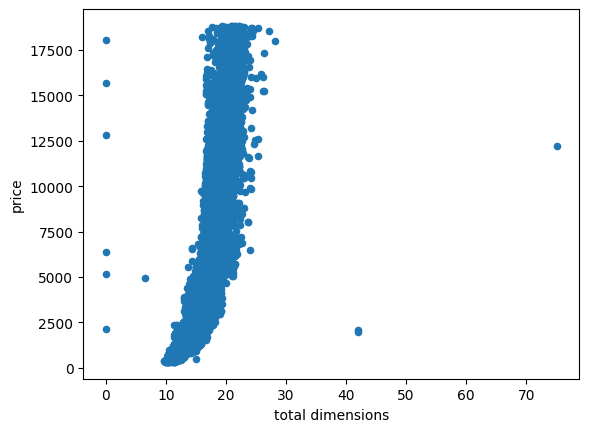

In [254]:
df.plot.scatter(x='total dimensions',y='price')

slope = df['total dimensions'].corr(df['price'])*(df['price'].std()/df['total dimensions'].std())

print(f"The slope of the graph is {slope}")

In [262]:
df['total dimensions'] = df['x'] + df['y'] + df['z']

correlation = df[['total dimensions','price']].corr()

correlation

,total dimensions,price
total dimensions,1.00000,0.88123
price,0.88123,1.00000


### Findings:
Due to the strong positive correlation coefficient of 0.88 and the very large positive slope, it can be said that the price of a diamond is dependent on its dimensions. As the sum of the dimensions of a diamond increases, so does its price.

### Question 2:

Another question I had is: how dependent is the price of a diamond on non-numerical features, such as cut, color, and clarity? To do this, I will perform linear regression to predict price from all of the numeric variables (carat, depth, table, x, y, z). I will then make a new column in the dataset for the residual of the predicted price. If the residual is, on average, small relative to the actual price of a diamond (I'll say within 25% of the price), then I can assume that the non-numerical features of a diamond (cut, color, clarity) do not greatly affect its price. However, if on average the residual is significantly large, meaning the predicted price is not an accurate prediction, this will be evidence that the non-numerical features, cut, color, and clarity, are greatly taken into account when determining diamond price.

In [261]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['carat','depth','table','x','y','z']],df[['price']])

df['predicted price'] = model.predict(df[['carat','depth','table','x','y','z']])

df['residual'] = df['price'] - df['predicted price']

df

,carat,cut,color,clarity,depth,table,price,x,y,z,total dimensions,predicted price,residual
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,10.36,338.975224,-12.975224
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,10.04,-69.708971,395.708971
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,10.43,141.756541,185.243459
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,11.06,187.220403,146.779597
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,11.44,46.114532,288.885468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,15.01,3322.932804,-565.932804
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,15.05,3133.119982,-376.119982
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,14.90,2505.835332,251.164668
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,16.01,4184.903464,-1427.903464


### Findings:

Because the values in the residual are very inconsistent (sometimes way too large, sometimes way too small, and sometimes fairly accurate), it can be said that the numerical features of a diamond alone are not enough to predict an accurate price using linear regression. In other words, this inconsistency can be attributed to the fact that you cannot predict the price of a diamond without taking into account its cut, color, and clarity.


# Section 5: Overall Summary


For this project, I found a 'diamonds' dataset on Kaggle to explore the factors influencing the value of diamonds, aligning with my interest in this mineral. The dataset includes numerical features such as price, carat, table, and dimensions (x, y, z), along with nun-numerical features such as cut, color, and clarity. Through exploratory data analysis, I uncovered a strong positive correlation between carat and price, depicted in a scatter plot. This finding prompted questions about the influence of dimensions and non-numerical features (cut, color, clarity) on diamond prices.

In response to the first question, I introduced a new variable, 'total dimensions,' and discovered a significant positive correlation with a coefficient of 0.88, indicating that as the sum of diamond dimensions increases, so does its price. The second question delved into the impact of non-numerical features on price. Linear regression, including carat, depth, table, and dimensions, showed inconsistent residuals, suggesting that these numerical features alone are insufficient to predict diamond prices accurately. The variability in residuals emphasized the crucial role of non-numerical features, specifically cut, color, and clarity, in determining diamond prices.

This project provided a deeper understanding of market dynamics within the diamond industry. The combination of exploratory data analysis, visualizations, correlation, and regression analysis unveiled nuanced relationships, showcasing the various factors contributing to the value of diamonds.